<a href="https://colab.research.google.com/github/taufikdimas/Machine-Learning-2025/blob/main/JS11%20-%20Klasifikasi%202/JS11_TugasPratikum1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd, io
from google.colab import files

# Upload → langsung baca → tampilkan 5 baris pertama
df = pd.read_csv(io.BytesIO(next(iter(files.upload().values()))), encoding='latin1')
df.head()

Saving voice.csv to voice.csv


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Data Preparation




In [ ]:
from sklearn.preprocessing import LabelEncoder

X = df.drop('label', axis=1)
y = df['label']

# Encode the 'label' column into numerical values
le = LabelEncoder()
y = le.fit_transform(y)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("First 5 encoded target values:", y[:5])
print("Original labels:", le.inverse_transform([0, 1]))

Shape of X: (3168, 20)
Shape of y: (3168,)
First 5 encoded target values: [1 1 1 1 1]
Original labels: ['female' 'male']


## Model Training and Evaluation (70:30 Split)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Split the data into training and testing sets (70:30 ratio)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Initialize SVM models with different kernels
svm_linear_70 = SVC(kernel='linear', random_state=42)
svm_poly_70 = SVC(kernel='poly', degree=3, random_state=42)
svm_rbf_70 = SVC(kernel='rbf', random_state=42)

# 3. Train each model
print("Training Linear SVM (70:30 split)...")
svm_linear_70.fit(X_train_70, y_train_70)
print("Training Polynomial SVM (70:30 split)...")
svm_poly_70.fit(X_train_70, y_train_70)
print("Training RBF SVM (70:30 split)...")
svm_rbf_70.fit(X_train_70, y_train_70)

# 4. Evaluate the accuracy of each trained model
accuracy_linear_70 = accuracy_score(y_test_70, svm_linear_70.predict(X_test_70))
accuracy_poly_70 = accuracy_score(y_test_70, svm_poly_70.predict(X_test_70))
accuracy_rbf_70 = accuracy_score(y_test_70, svm_rbf_70.predict(X_test_70))

# 5. Store the accuracy scores
results_70_30 = {
    'Linear_Kernel': accuracy_linear_70,
    'Polynomial_Kernel': accuracy_poly_70,
    'RBF_Kernel': accuracy_rbf_70
}

print("\nAccuracy for 70:30 split:")
for kernel, accuracy in results_70_30.items():
    print(f"{kernel}: {accuracy:.4f}")

Training Linear SVM (70:30 split)...
Training Polynomial SVM (70:30 split)...
Training RBF SVM (70:30 split)...

Accuracy for 70:30 split:
Linear_Kernel: 0.9264
Polynomial_Kernel: 0.4900
RBF_Kernel: 0.6625


## Model Training and Evaluation (80:20 Split)




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Split the data into training and testing sets (80:20 ratio)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize SVM models with different kernels
svm_linear_80 = SVC(kernel='linear', random_state=42)
svm_poly_80 = SVC(kernel='poly', degree=3, random_state=42)
svm_rbf_80 = SVC(kernel='rbf', random_state=42)

# 3. Train each model
print("Training Linear SVM (80:20 split)...")
svm_linear_80.fit(X_train_80, y_train_80)
print("Training Polynomial SVM (80:20 split)...")
svm_poly_80.fit(X_train_80, y_train_80)
print("Training RBF SVM (80:20 split)...")
svm_rbf_80.fit(X_train_80, y_train_80)

# 4. Predict the labels for the 80:20 test set
y_pred_linear_80 = svm_linear_80.predict(X_test_80)
y_pred_poly_80 = svm_poly_80.predict(X_test_80)
y_pred_rbf_80 = svm_rbf_80.predict(X_test_80)

# 5. Calculate the accuracy score for each model
accuracy_linear_80 = accuracy_score(y_test_80, y_pred_linear_80)
accuracy_poly_80 = accuracy_score(y_test_80, y_pred_poly_80)
accuracy_rbf_80 = accuracy_score(y_test_80, y_pred_rbf_80)

# 6. Store and print the accuracy scores
results_80_20 = {
    'Linear_Kernel': accuracy_linear_80,
    'Polynomial_Kernel': accuracy_poly_80,
    'RBF_Kernel': accuracy_rbf_80
}

print("\nAccuracy for 80:20 split:")
for kernel, accuracy in results_80_20.items():
    print(f"{kernel}: {accuracy:.4f}")

Training Linear SVM (80:20 split)...
Training Polynomial SVM (80:20 split)...
Training RBF SVM (80:20 split)...

Accuracy for 80:20 split:
Linear_Kernel: 0.9416
Polynomial_Kernel: 0.4826
RBF_Kernel: 0.6562


## Tabulate Results




In [ ]:
import pandas as pd

# Create lists to store data for the DataFrame
results_data = []

# Add results from 70:30 split
for kernel, accuracy in results_70_30.items():
    results_data.append({'Split Ratio': '70:30', 'Kernel Type': kernel, 'Accuracy': accuracy})

# Add results from 80:20 split
for kernel, accuracy in results_80_20.items():
    results_data.append({'Split Ratio': '80:20', 'Kernel Type': kernel, 'Accuracy': accuracy})

# Create the DataFrame
accuracy_df = pd.DataFrame(results_data)

# Display the DataFrame
print("\nSummary of SVM Model Accuracies:")
print(accuracy_df.to_markdown(index=False, numalign="left", stralign="left"))


Summary of SVM Model Accuracies:
| Split Ratio   | Kernel Type       | Accuracy   |
|:--------------|:------------------|:-----------|
| 70:30         | Linear_Kernel     | 0.926393   |
| 70:30         | Polynomial_Kernel | 0.490011   |
| 70:30         | RBF_Kernel        | 0.662461   |
| 80:20         | Linear_Kernel     | 0.94164    |
| 80:20         | Polynomial_Kernel | 0.48265    |
| 80:20         | RBF_Kernel        | 0.656151   |


## Visualization



In [ ]:
from sklearn.metrics import accuracy_score

# Obtain the predicted labels for the 70:30 split models
y_pred_linear_70 = svm_linear_70.predict(X_test_70)
y_pred_poly_70 = svm_poly_70.predict(X_test_70)
y_pred_rbf_70 = svm_rbf_70.predict(X_test_70)

print("Predicted labels generated for 70:30 split models.")

Predicted labels generated for 70:30 split models.


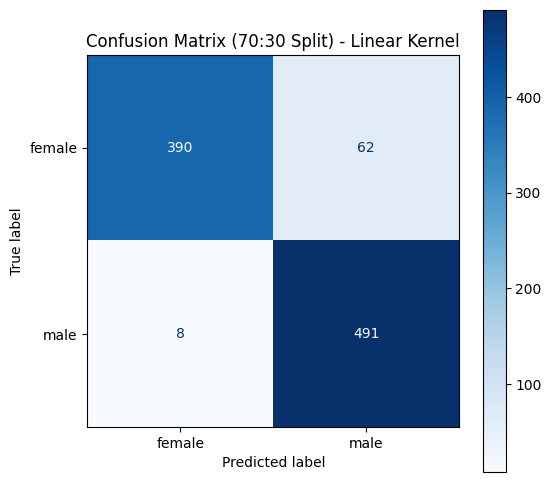

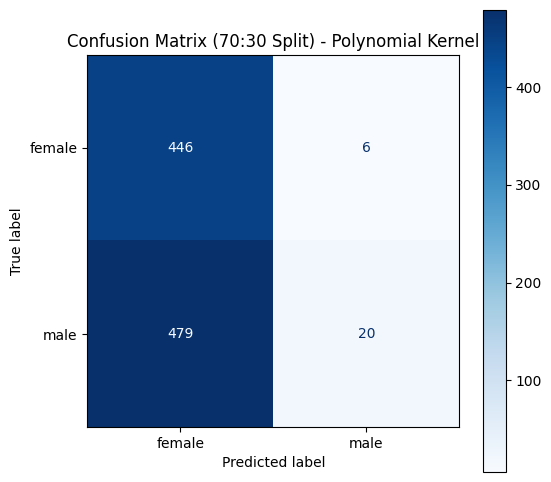

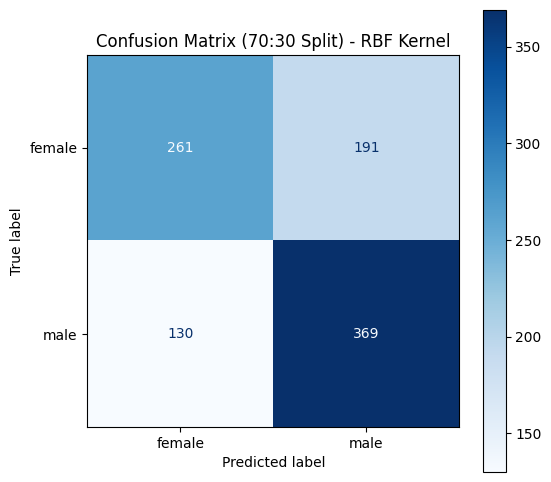

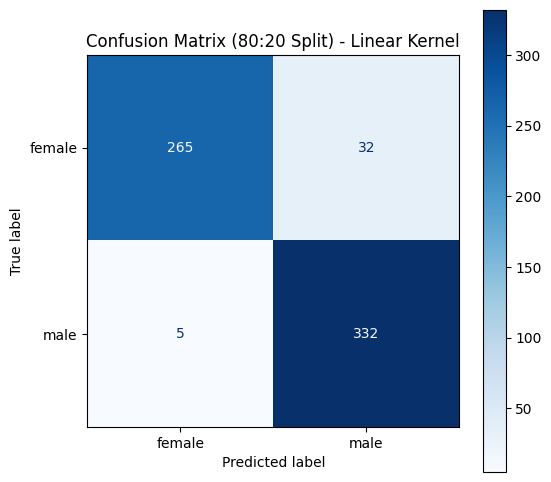

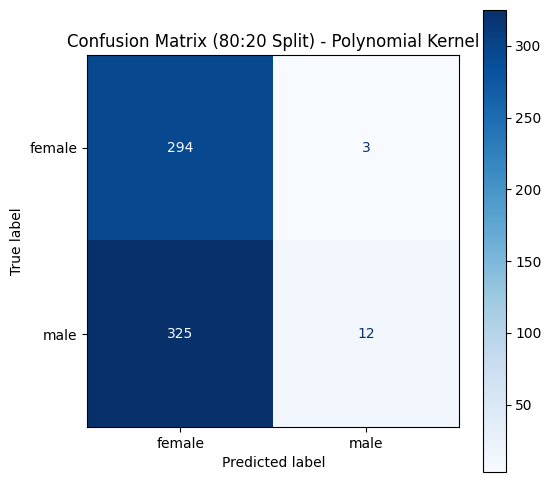

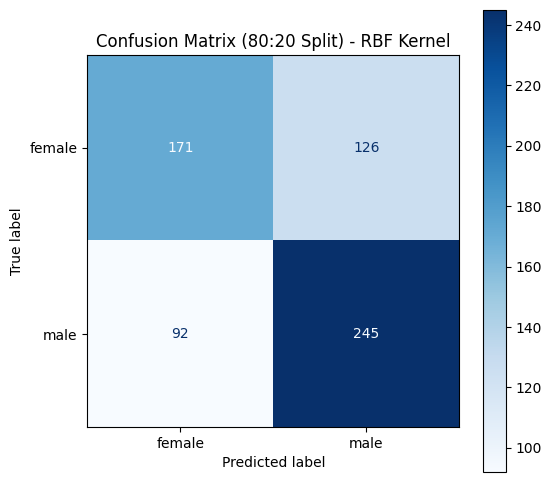

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Get class labels from the LabelEncoder
class_labels = le.classes_

# Define models, their predictions, true labels, and titles for plotting
plot_configs = [
    {'split': '70:30', 'kernel': 'Linear', 'y_true': y_test_70, 'y_pred': y_pred_linear_70},
    {'split': '70:30', 'kernel': 'Polynomial', 'y_true': y_test_70, 'y_pred': y_pred_poly_70},
    {'split': '70:30', 'kernel': 'RBF', 'y_true': y_test_70, 'y_pred': y_pred_rbf_70},
    {'split': '80:20', 'kernel': 'Linear', 'y_true': y_test_80, 'y_pred': y_pred_linear_80},
    {'split': '80:20', 'kernel': 'Polynomial', 'y_true': y_test_80, 'y_pred': y_pred_poly_80},
    {'split': '80:20', 'kernel': 'RBF', 'y_true': y_test_80, 'y_pred': y_pred_rbf_80},
]

for config in plot_configs:
    fig, ax = plt.subplots(figsize=(6, 6))
    ConfusionMatrixDisplay.from_predictions(config['y_true'], config['y_pred'], display_labels=class_labels, cmap='Blues', ax=ax)
    ax.set_title(f"Confusion Matrix ({config['split']} Split) - {config['kernel']} Kernel")
    plt.show()

## Analysis





### Data Analysis Key Findings


* **Data Encoding**: Kolom 'label' berhasil dikodekan secara numerik, memetakan 'female' ke 0 dan 'male' ke 1.
* **Performa Model (Split 70:30)**:

  * Kernel Linear mencapai akurasi tertinggi sebesar 0.9264.
  * Kernel RBF berkinerja moderat dengan akurasi 0.6625.
  * Kernel Polinomial menunjukkan performa terendah, dengan akurasi 0.4900.
* **Performa Model (Split 80:20)**:

  * Kernel Linear kembali meraih akurasi tertinggi sebesar 0.9416.
  * Akurasi Kernel RBF adalah 0.6562.
  * Kernel Polinomial tetap menjadi yang terendah, dengan akurasi 0.4826.
* **Perbandingan Kernel**: Pada kedua rasio split, Kernel Linear secara konsisten mengungguli Kernel Polinomial dan RBF dengan selisih signifikan. Kernel Polinomial menunjukkan performa yang sangat buruk.
* **Dampak Rasio Split**:

  * Untuk Kernel Linear, peningkatan porsi data latih dari 70% menjadi 80% sedikit meningkatkan akurasi dari 0.9264 menjadi 0.9416.
  * Akurasi Kernel Polinomial dan RBF relatif stabil atau sedikit menurun pada split 80:20 dibandingkan 70:30, mengindikasikan bahwa masalah performa keduanya bukan terutama akibat jumlah data dalam rentang ini.
* **Visualisasi**: Matriks kebingungan untuk enam model (Linear, Polinomial, RBF pada split 70:30 dan 80:20) berhasil dibuat, yang secara visual mengonfirmasi perbedaan akurasi—terutama true positive dan true negative yang tinggi pada Kernel Linear serta distribusi prediksi yang lebih buruk pada Kernel Polinomial.

### Insights or Next Steps

*   **Optimal Kernel Selection**: Model SVM dengan kernel Linear menunjukkan kinerja terbaik secara konsisten untuk klasifikasi jenis kelamin dari data suara, dengan akurasi di atas 92% di kedua rasio split. Kernel ini adalah pilihan yang paling efektif untuk tugas ini.
*   **Further Optimization**: Untuk meningkatkan kinerja lebih lanjut, khususnya untuk kernel RBF yang memiliki potensi namun tidak berkinerja sebaik Linear, perlu dilakukan *hyperparameter tuning* (misalnya, untuk parameter 'C' dan 'gamma' pada kernel RBF). Investigasi lebih lanjut juga diperlukan untuk memahami mengapa kernel Polynomial berkinerja sangat buruk, yang mungkin mengindikasikan ketidaksesuaian dengan struktur data atau kebutuhan akan penyesuaian derajat (degree) yang berbeda.
